# Gradient Boosting Challenge
Unit 3 / Lesson 5 / Project 3

While this model is already doing alright, we've seen from the Type I and Type II error rates that there is definitely room for improvement.
Your task is to see how low you can get the error rates to go in the test set, based on your model in the training set.

Strategies you might use include:
* Creating new features
* Applying more overfitting-prevention strategies like subsampling
* More iterations
* Trying a different loss function
* Changing the structure of the weak learner: Allowing more leaves in the tree, or other modifications

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [2]:
# import data
PATH = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv"
)
df = pd.read_csv(PATH).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
data = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]
target = df['partner'] - 1

# Make the categorical variable 'country' into dummies.
data = pd.concat([data, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
# Put 90% of the data in the training set.
# And put 10% in the test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=42)

In [3]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators':500,
          'max_depth':2,
          'loss':'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.04609929078014184
Percent Type II errors: 0.17757774140752863

Test set accuracy:
Percent Type I errors: 0.05276073619631902
Percent Type II errors: 0.18773006134969325


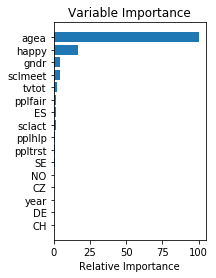

In [4]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5

plt.subplot(1,2,2)
plt.barh(pos, feature_importance[sorted_idx], align='center')

plt.yticks(pos, data.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### Parameter EDA

Fit a gradient boosting classifier with default parameters to get a baseline for performance.

In [ ]:
# set default parameters
params = {'n_estimators':500,
          'max_depth':2,
          'loss':'deviance'}

model = ensemble.GradientBoostingClassifier(**params)

model.fit(X_train, y_train)

y_pred = y_pred = model.predict(X_test)

We will use AUC (Area Under Curve) as the evaluation metric.

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7188118125811045

Learning rate shrinks the contribution of each tree by learning_rate.

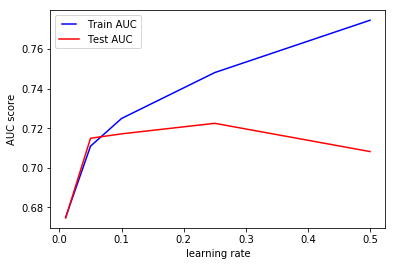

In [ ]:
learning_rates = [0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []

for eta in learning_rates:
   model = ensemble.GradientBoostingClassifier(learning_rate=eta)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train AUC")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.show()

Using a high learning rate results in overfitting.
For this data, a learning rate of 0.1 is optimal.

`n_estimators` represents the number of trees in the forest.
Usually the more trees there are, the better the model fits the data.
However adding a lot of trees can slow down the training process considerably.
let's do a parameter search to find the sweet spot.

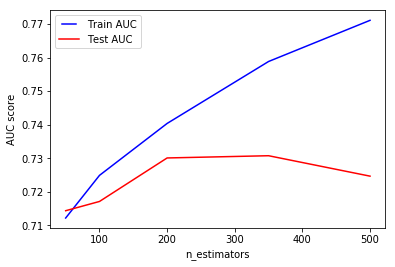

In [ ]:
n_estimators = [50, 100, 200, 350, 500]
train_results = []
test_results = []

for estimator in n_estimators:
   model = ensemble.GradientBoostingClassifier(n_estimators=estimator)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

Increasing the number of estimators may result in overfitting.
In our case, we can use a higher number of estimators (>75) without risk of overfitting.

`max_depth` indicates how deep the built tree can be.
The deeper the tree, the more splits it has and the more it captures the data.
We fit a decision tree with depths ranging from 1 to 32 and plot the training and test errors.

In [ ]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
   model = ensemble.GradientBoostingClassifier(max_depth=max_depth)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree Depth')
plt.show()

`min_samples_split` represents the minimum number of samples required to split an internal node.
This can vary between considering at least one sample at each node to considering all of the samples at each node.
When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node.
Here we will vary the parameter from 10% to 100% of the samples.

In [ ]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
   model = ensemble.GradientBoostingClassifier(min_samples_split=min_samples_split)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC Score')
plt.xlabel('min samples split')
plt.show()

It looks like the model performs best when `min_samples_split` utilizes 50%-90% of the samples at each node.
Outside of that range, it risks underfitting the data.

`min_samples_leaf` is The minimum number of samples required at a leaf node.
This similar to `min_samples_splits`, however, this describes the minimum number of samples at each leaf.

In [ ]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
   model = ensemble.GradientBoostingClassifier(min_samples_leaf=min_samples_leaf)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test AU")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC Score')
plt.xlabel('min samples leaf')
plt.show()

Looks like increasing our `min_samples_leaf` doesn't cause our model to overfit.

`max_features` represents the number of features to consider when looking for the best split.

In [ ]:
max_features = list(range(1,data.shape[1]))
train_results = []
test_results = []

for max_feature in max_features:
   model = ensemble.GradientBoostingClassifier(max_features=max_feature)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_features, test_results, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

It looks like increasing `max_features` will improve our model and potentially decrease the likelihood of overfitting.

### Grid search

In [ ]:
# import GridSearch
from sklearn.model_selection import GridSearchCV

# define our parameter ranges
param_grid = {
    'learning_rate':[0.5, 0.25, 0.1, 0.05, 0.01],
    'n_estimators':[50, 100, 200, 350, 500],
    'subsample':np.linspace(0.1, 1.0, num=5, endpoint=True),
    'min_samples_split':np.linspace(0.1, 1.0, num=5, endpoint=True),
    'min_samples_leaf':np.linspace(0.1, 0.5, num=5, endpoint=True),
    'max_depth':np.linspace(1, 32, num=5, endpoint=True),
    'max_features':list(range(1,data.shape[1])),
    'warm_start':[False, True],
    'loss':['deviance', 'exponential'],
}

# Initialize and fit the model.
clf_best = ensemble.GradientBoostingClassifier()
clf_best = GridSearchCV(clf_best, param_grid, cv=5)
clf_best.fit(X_train, y_train)

In [ ]:
#sorted(clf.cv_results_.keys())
clf_best.best_params_

In [ ]:
predict_train_best = clf_best.predict(X_train)
predict_test_best = clf_best.predict(X_test)

# Accuracy tables.
table_train_best = pd.crosstab(y_train, predict_train_best, margins=True)
table_test_best = pd.crosstab(y_test, predict_test_best, margins=True)

train_tI_errors_best = table_train_best.loc[0.0,1.0] / table_train_best.loc['All','All']
train_tII_errors_best = table_train_best.loc[1.0,0.0] / table_train_best.loc['All','All']

test_tI_errors_best = table_test_best.loc[0.0,1.0]/table_test_best.loc['All','All']
test_tII_errors_best = table_test_best.loc[1.0,0.0]/table_test_best.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors_best, train_tII_errors_best,
         test_tI_errors_best, test_tII_errors_best))

In [ ]:
feature_importance_best = clf_best.feature_importances_

# Make importances relative to max importance.
feature_importance_best = 100.0 * (feature_importance_best / feature_importance_best.max())
sorted_idx = np.argsort(feature_importance_best)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance_best[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()